#  Task 8: Clustering with K-Means


## 🎯 Objective

Apply **unsupervised learning** using the **K-Means clustering algorithm** to segment customers based on their income and spending behavior.


## Import Libraries

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# For pretty plots
sns.set(style="whitegrid")


## 📌 Step 1: Load the Dataset


In [3]:
df = pd.read_csv(r"C:\Users\uthil\Desktop\INTERNSHIP\TASK 8\mall_customers.csv")
df.head()


df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 🧹 Step 2: Preprocessing - Encode Gender


In [4]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male: 1, Female: 0


## 📊 Step 3: Visualize Features


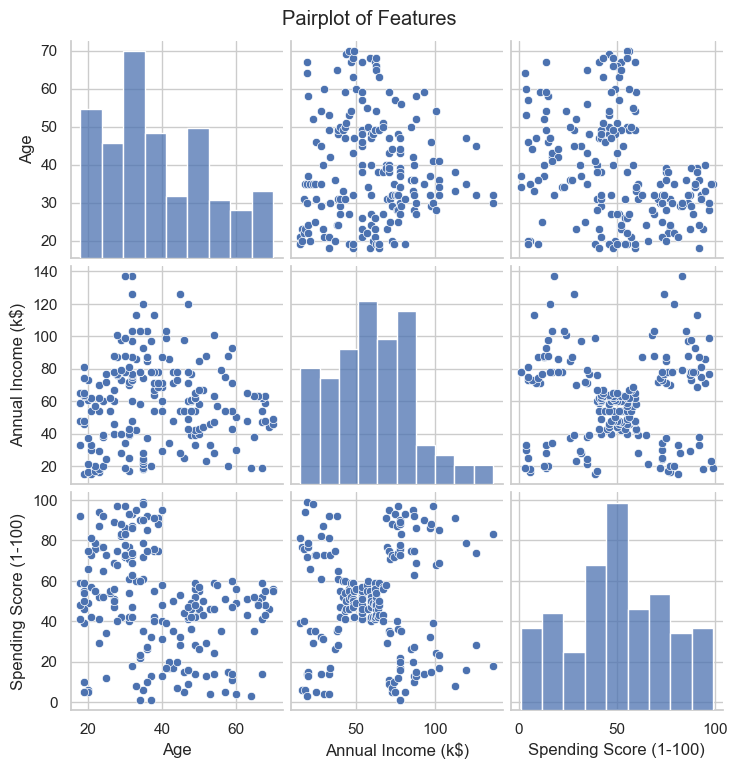

In [5]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()


## 📌 Step 4: Feature Selection


In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


## 📉 Step 5: Elbow Method to Find Optimal K


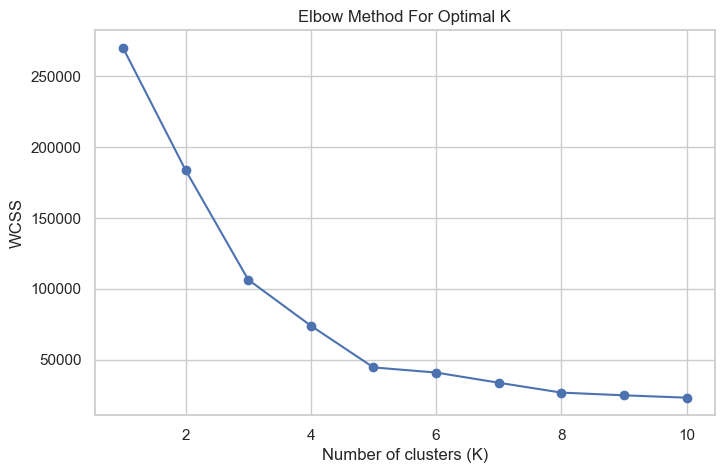

In [14]:
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal K')
plt.grid(True)
plt.show()


## 🧪 Step 6: Silhouette Score for Each K


In [8]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    print(f"K={k} => Silhouette Score: {score:.4f}")


K=2 => Silhouette Score: 0.3956
K=3 => Silhouette Score: 0.4676
K=4 => Silhouette Score: 0.4938
K=5 => Silhouette Score: 0.5539
K=6 => Silhouette Score: 0.5128
K=7 => Silhouette Score: 0.5017
K=8 => Silhouette Score: 0.4963
K=9 => Silhouette Score: 0.4559
K=10 => Silhouette Score: 0.4426


## 🚀 Step 7: Train Final KMeans Model


In [10]:
optimal_k = 5  # Chosen based on Elbow and Silhouette
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


## 🖼️ Step 8: Visualize Clusters


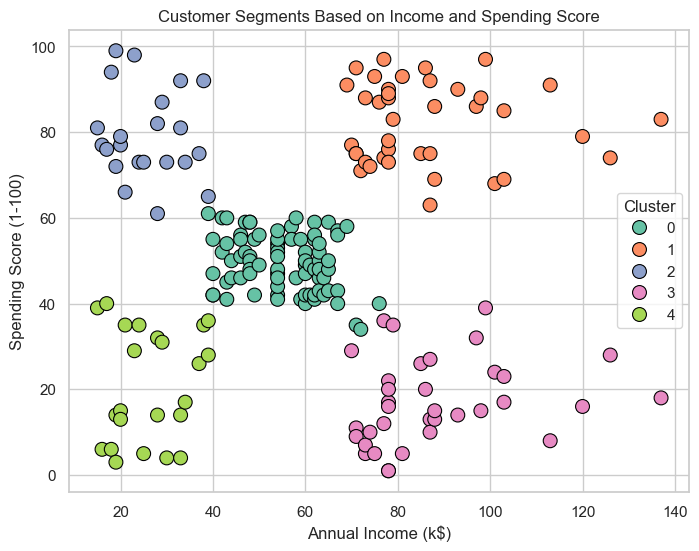

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set2',
    data=df,
    s=100,
    edgecolor='black'
)
plt.title("Customer Segments Based on Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 📉 Step 9: PCA for Dimensionality Reduction


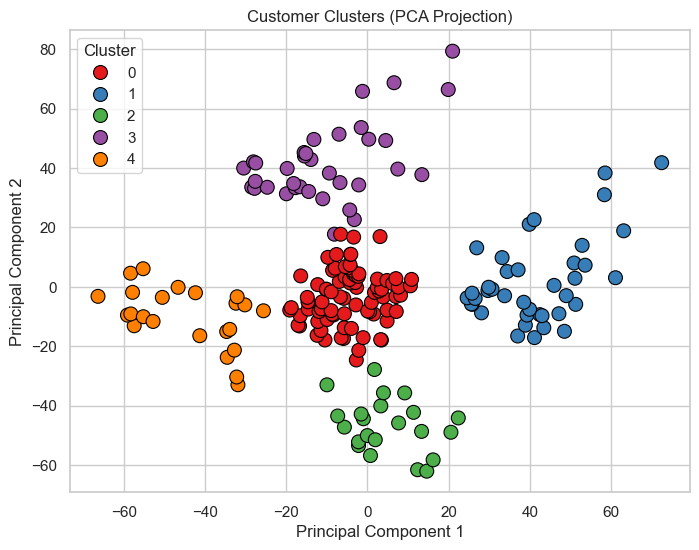

In [12]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Visualize the clusters in PCA-reduced space
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    palette='Set1',
    data=df,
    s=100,
    edgecolor='black'
)
plt.title("Customer Clusters (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


## 📋 Step 10: Analyze Cluster Characteristics


In [13]:
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9


## ✅ Conclusion

K-Means clustering allowed us to segment mall customers into distinct groups based on spending behavior and income. These insights can be used for targeted marketing and strategic decisions.
